### Average over multiple runs  - Phase or amplirude noise -  Method 1
Plot the emittance growth in the presence of phase noise - PN. The simulation for each set of parameters is repeated multiple times. The mean and the standard deviation of the emittance values are computed over all runs (part 3) for each turn. The normalised emittance is used here. 

In [1]:
import sys
sys.path.append('../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
import csv
import numpy as np
import pickle
import matplotlib.pyplot as plt

#### Plotting paramerters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data folder

b) Load the values of the transverse emittances in lists.

In [3]:
n_runs = 3 # number of runs that the simulation was repeated
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 


#### Convert turns to time [s]

In [7]:
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [12]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
study_name ='sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsON_500slices_ayy9600.0_' 
noise_type = 'PN'
#PN_name_template = '{}_myteest'.format(type_of_noise)

In [13]:
ex_dict_pn = {} # type: dictionary
ey_dict_pn = {}

for run in range(n_runs):
    print(run)
    temp_name = 'run{}'.format(run+1) # the suffix of the name of the current study
    # A. load the turn by turn data in a dictionary
    meanX, meanY, meanXsq, meanYsq, emitX, emitY = np.loadtxt(path_to_data+f'{study_name}run{run}/file.txt', delimiter = ",", unpack = True)
    # B. Create a different list for each run and save the emittance values
    ex_dict_pn[temp_name] = emitX 
    ey_dict_pn[temp_name] = emitY

0
1
2


In [14]:
len(ey_dict_pn[temp_name])

1000

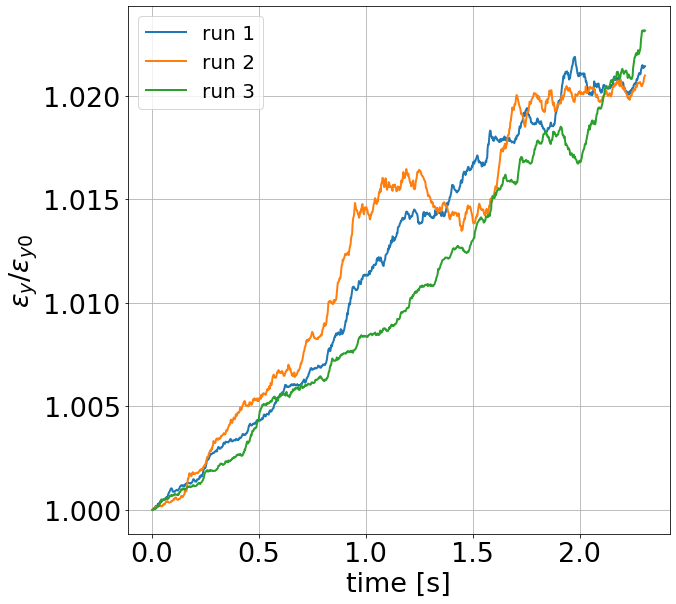

In [15]:
plot_all = True
if plot_all:
    for run in range(n_runs):
        temp_name = 'run{}'.format(run+1) # the suffix of the name of the current study
        plt.plot(tspan, ey_dict_pn[temp_name]/ey_dict_pn[temp_name][0], label=f'run {run+1}', lw=2)
plt.ylabel(r'$\epsilon_y / \epsilon_{y0}$')
plt.xlabel('time [s]')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.legend()

plt.grid()
plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/ey_{study_name}_{n_runs}run.png')

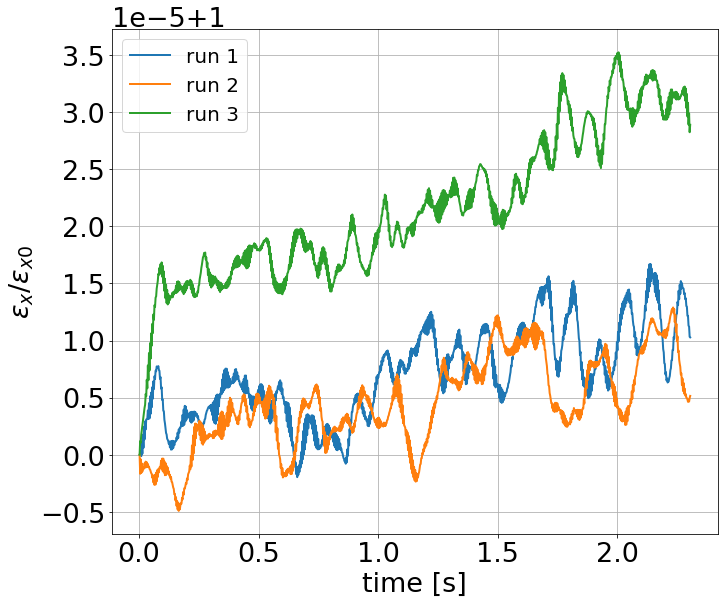

In [16]:
plot_all = True
if plot_all:
    for run in range(n_runs):
        temp_name = 'run{}'.format(run+1) # the suffix of the name of the current study
        plt.plot(tspan, ex_dict_pn[temp_name]/ex_dict_pn[temp_name][0], label=f'run {run+1}', lw=2)
plt.ylabel(r'$\epsilon_x / \epsilon_{x0}$')
plt.xlabel('time [s]')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.legend()

plt.grid()
plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/ex_{study_name}_{n_runs}run.png')

In [31]:
#### 2) Here the mean and the standard deviation of the emittance values are computed over all runs. 

In [32]:
ex_mean_pn = []
ey_mean_pn = []

ex_std_pn = []
ey_std_pn = []

n_saved_turns = int(n_turns/decTurns)


for turn in range(n_saved_turns):
    ex_temp_pn = []
    ey_temp_pn = []

    # keep all the emittance values for all the runs
    for run in range(n_runs):
        temp_name = 'run{}'.format(run+1)
        ex_temp_pn.append(ex_dict_pn[temp_name][turn])
        ey_temp_pn.append(ey_dict_pn[temp_name][turn])
    # calculate and append the mean of the emittance value for every turn
    ex_mean_pn.append(np.mean(ex_temp_pn))
    ey_mean_pn.append(np.mean(ey_temp_pn))
    # calculate and append the standard deviation of the emittance value for every turn
    ex_std_pn.append(np.std(ex_temp_pn))
    ey_std_pn.append(np.std(ey_temp_pn))    

#### 4) Plot evolution of the H (horizontal emittance) emittance

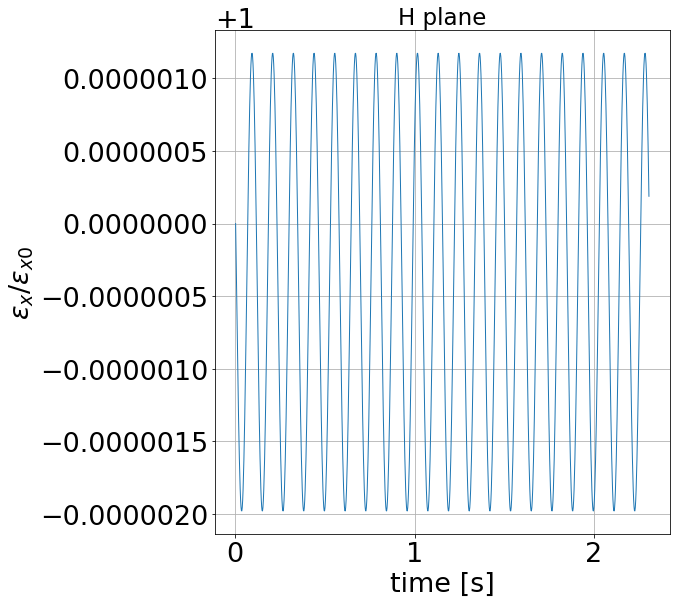

In [33]:
plt.plot(tspan, ex_mean_pn/ex_mean_pn[0], c='C0')
plt.plot(1,1,c='C0', linewidth = 3)     
plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_x / \epsilon_{x0}$')
plt.title('H plane')
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('H_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}runs.png'.format(type_of_noise, n_runs))

#### 5) Plot evolution of the V (vertical emittance) emittance

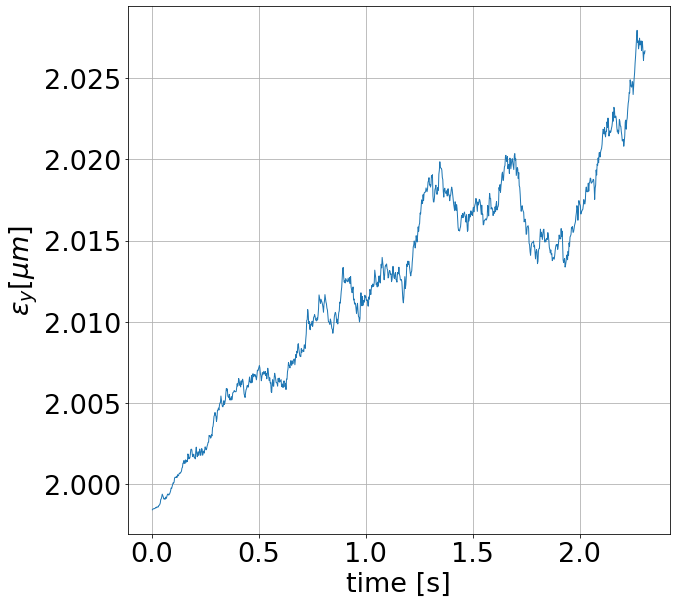

In [34]:
plt.plot(tspan, np.array(ey_mean_pn)*1e6, c='C0')    
plt.plot(2,2,c='C0', linewidth = 3)       
plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y [\mu m]$')
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emittance_growth_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}runs.png'.format(type_of_noise, n_runs))

#### 6) Plot evolution of the standard deviation $\sigma$ of the emittance values (in the vertical plane)

No handles with labels found to put in legend.


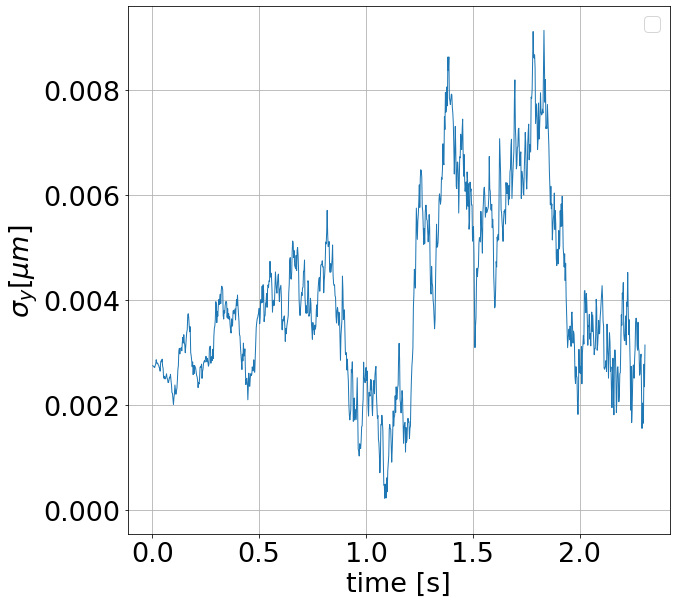

In [35]:
plt.plot(tspan, np.array(ey_std_pn)*1e6, c='C0')   
plt.plot(0,0,c='C0',  linewidth = 3)   
plt.xlabel('time [s]')
plt.ylabel(r'$\sigma_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_std_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

#### 7) Calculate the emittance growth rate via a linear fit
- Polynomial fit. The degree of the fitting polynomial is 1. 

In [36]:
# linear fit
[m_y, b_y], cov_y = np.polyfit(tspan, ey_mean_pn, 1, cov=True)
# compute the error of the gradient of the fit slope
err_y = np.sqrt(np.diag(cov_y))

In [37]:
# linear fit
[m_x, b_x], cov_x = np.polyfit(tspan, ex_mean_pn, 1, cov=True)
# compute the error of the gradient of the fit slope
err_x = np.sqrt(np.diag(cov_x))

### Plot transverese average emittance growth along with the linear fit

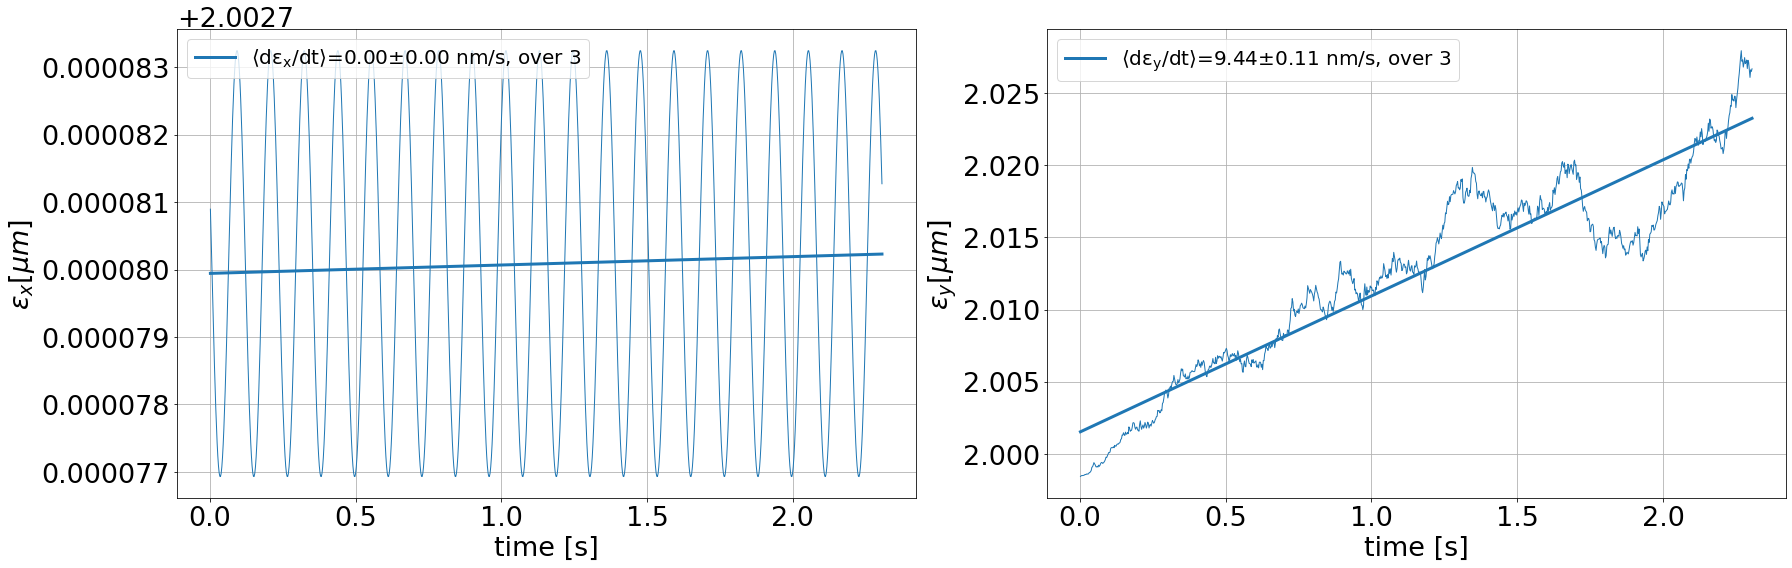

In [40]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(25, 8))

ax1.plot(tspan, np.array(ex_mean_pn)*1e6, c='C0')
ax1.plot(tspan, (m_x*tspan+b_x)*1e6, c = 'C0', label=r'$\mathrm{\langle d\epsilon_x/dt} \rangle $'+'={0:.2f}'.format(m_x*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_x[0]*1e9)+f', over {n_runs}', linewidth = 3)

ax1.set_xlabel('time [s]')
ax1.set_ylabel(r'$\epsilon_x [\mu m]$')
ax1.legend(loc=0)
ax1.grid()

# vertical plane
ax2.plot(tspan, np.array(ey_mean_pn)*1e6, c='C0')
ax2.plot(tspan, (m_y*tspan+b_y)*1e6, c = 'C0', label=r'$\mathrm{\langle d\epsilon_y/dt} \rangle $'+'={0:.2f}'.format(m_y*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_y[0]*1e9)+f', over {n_runs}', linewidth = 3)

ax2.set_xlabel('time [s]')
ax2.set_ylabel(r'$\epsilon_y [\mu m]$')
ax2.legend(loc=0)
ax2.grid()



plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'./output/epsnx_epsny_{study_name}_mean{n_runs}runs_withFit.png')

### 8) Compute the theoretically expected rate

In [41]:
# Machine parameters
betay = 73.81671646 # 73 m at CC2, 76 m at CC1
Vcc = 1e6 # V
Eb = 270e9 # eV
gamma_0 = 287.8 
beta_0 = np.sqrt(1 - 1/gamma_0**2)
circumference = 6911.5623 # m
frev = 299792458/circumference # Hz
sigma_z = 0.155 # m
f_CC = 400.789e6 # CC frequency in Hz
clight = 299792458 # m/s
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
#PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = 3.99e-11 #(A_amplitude * scale_factor)**2/frev # V^2/Hz
print(PSD_phi, PSD_A)

1.6806723392287607e-10 3.99e-11


In [42]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.5168486015622045, CDeltaA = 0.24157569921889774
expected growth = 23.813362141833874 nm/s


#### 8) Plot fill between

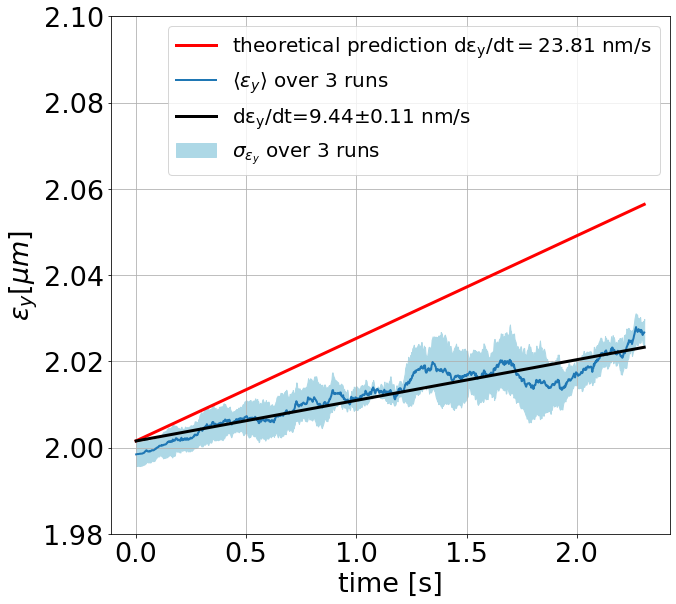

In [43]:
# std over all runs
plt.fill_between(tspan, np.array(ey_mean_pn)*1e6 - np.array(ey_std_pn)*1e6, np.array(ey_mean_pn)*1e6 + np.array(ey_std_pn)*1e6, color=fill_bewtween_color, label=r'$\sigma_{\epsilon_y} $'+' over {} runs'.format(n_runs))

# expected slope from analytical calculations
plt.plot(tspan, (expected_growth*tspan+b_y)*1e6, c='r', linewidth=3, label= 'theoretical prediction '+r'$\mathrm{d\epsilon _y/dt=}$'+'{0:.2f} nm/s'.format(expected_growth*1e9))

# emittance values obtained from the simulation averaged over turns
plt.plot(tspan, np.array(ey_mean_pn)*1e6, c=my_color, linewidth=2, label=r'$\langle \epsilon_y \rangle $'+' over {} runs'.format(n_runs))

# linear fit on the emittance values obtained from the simulation averaged over turn
plt.plot(tspan, (m_y*tspan+b_y)*1e6, c = 'k', label=r'$\mathrm{d\epsilon_y/dt}$'+'={0:.2f}'.format(m_y*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_y[0]*1e9), linewidth = 3)




plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.ylim(1.98, 2.10) #2.26
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'./output/dey_{study_name}_mean{n_runs}run_fill_between.png')

#### B) y axis: emittance values after substracting the initial emittance

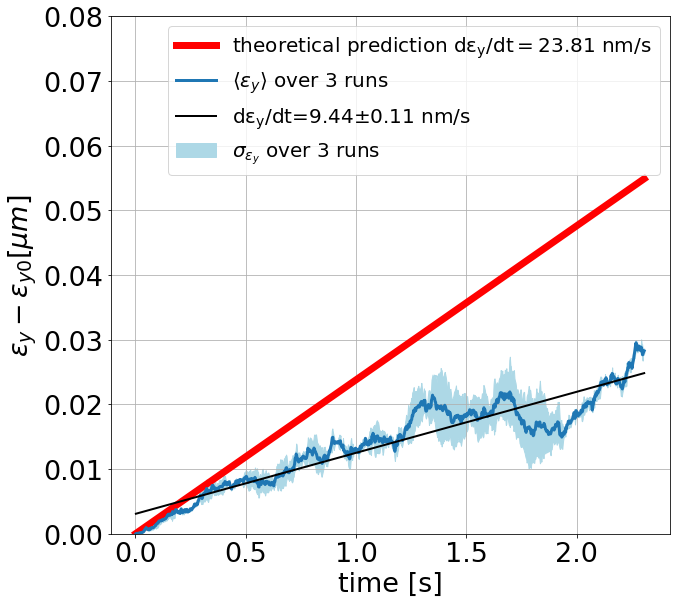

In [44]:
initial_std = ey_std_pn[0]
initial_mean_emittance = ey_mean_pn[0]
# std over all runs
plt.fill_between(tspan, np.array(ey_mean_pn-initial_mean_emittance )*1e6 - np.array(ey_std_pn-initial_std)*1e6, np.array(ey_mean_pn-initial_mean_emittance)*1e6 + np.array(ey_std_pn-initial_std)*1e6, color=fill_bewtween_color, label=r'$\sigma_{\epsilon_y}$'+ ' over {} runs'.format(n_runs))

# expected slope from analytical calculations
plt.plot(tspan, (expected_growth*tspan)*1e6, c='r', linewidth=7, label= 'theoretical prediction '+r'$\mathrm{d\epsilon _y/dt=}$'+'{0:.2f} nm/s'.format(expected_growth*1e9))

# emittance values obtained from the simulation averaged over turns
plt.plot(tspan, np.array(ey_mean_pn-initial_mean_emittance)*1e6, c=my_color, linewidth=3, label=r'$\langle \epsilon_y \rangle $'+' over {} runs'.format(n_runs))

# linear fit on the emittance values obtained from the simulation averaged over turns
plt.plot(tspan, (b_y-initial_mean_emittance)*1e6+(m_y*tspan)*1e6, c = 'k', label=r'$\mathrm{d\epsilon_y/dt}$'+'={0:.2f}'.format(m_y*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_y[0]*1e9), linewidth = 2)


#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y - \epsilon_{y0} [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.ylim(0,0.08) # 0.3
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'./output/dey_{study_name}_mean{n_runs}run_fill_between_v2.png', bbox_inches='tight')

### Horizontal plane, no comparison with the theoretical model as it is expected to be zero

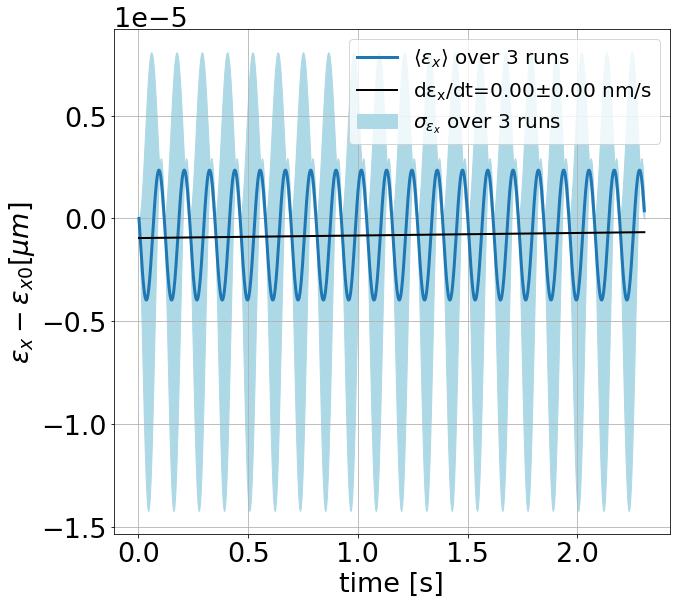

In [46]:
initial_std = ex_std_pn[0]
initial_mean_emittance = ex_mean_pn[0]
# std over all runs
plt.fill_between(tspan, np.array(ex_mean_pn-initial_mean_emittance )*1e6 - np.array(ex_std_pn-initial_std)*1e6, np.array(ex_mean_pn-initial_mean_emittance)*1e6 + np.array(ex_std_pn-initial_std)*1e6, color=fill_bewtween_color, label=r'$\sigma_{\epsilon_x}$'+ ' over {} runs'.format(n_runs))

# emittance values obtained from the simulation averaged over turns
plt.plot(tspan, np.array(ex_mean_pn-initial_mean_emittance)*1e6, c=my_color, linewidth=3, label=r'$\langle \epsilon_x \rangle $'+' over {} runs'.format(n_runs))

# linear fit on the emittance values obtained from the simulation averaged over turns
plt.plot(tspan, (b_x-initial_mean_emittance)*1e6+(m_x*tspan)*1e6, c = 'k', label=r'$\mathrm{d\epsilon_x/dt}$'+'={0:.2f}'.format(m_x*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_x[0]*1e9), linewidth = 2)

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_x- \epsilon_{x0} [\mu m]$')
plt.legend(loc=0)
plt.grid()
#plt.ylim(0,0.08) # 0.3
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'./output/dex_{study_name}_mean{n_runs}run_fill_between_v2.png', bbox_inches='tight')

#### Option for saving the turn by turn emittance values

In [93]:
save_data = False
if save_data:
    my_ey = {'turn':list(np.arange(n_turns)), 'Qy':ey_mean_pn}
    pickle.dump(my_ey, open('./output/tbt_ey_{}_turns{}.pkl'.format(type_of_noise, n_turns), 'wb'))